#### Let us import all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Data Understanding and visualisation
#### Let's read the dataset and check the columns to see if they have any null values

In [3]:
dataframe = pd.read_csv("day.csv",index_col="instant")
dataframe.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
dataframe.shape

(730, 15)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


#### There are 730 rows and 16 columns in the dataset and neither of them are having any null values so we don't need to drop any columns

In [6]:
dataframe.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Based on the data dictionary we know the columns casual, registered and cnt shows total casual rentals, registered rentals and total rentals (which is summation of casual and registered).
#### Hence the column casual and registered can be dropped from analysis.
#### We can drop the column dteday also as it is merely a date of rental, hence insignificant to analysis

In [7]:
dataframe.drop(columns=["casual","registered","dteday"],inplace=True)
dataframe.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Let's map the categorical variables season, weekday, yr, weathersit & mnth based on the information we have in data dictionary

In [8]:
seasonsmap = {'1':'spring','2':'summer','3':'fall','4':'winter'}
yrmap = {'0':'2018','1':'2019'}
weathermap = {"1":"Clear","2":"Mist","3":"Light Snow","4":"Heavy Rain"}
mnthmap = {'1':'Jan','2':'Feb','3':'Mar','4':'Apr','5':'May','6':'Jun','7':'Jul','8':'Aug','9':'Sep','10':'Oct','11':'Nov','12':'Dec'}
weekdaysmap = {'0':'Sunday','1':'Monday','2':'Tuesday','3':'Wednesday','4':'Thursday','5':'Friday','6':'Saturday'}

In [9]:
dataframe["season"] = dataframe["season"].astype(str)
dataframe["season"] = dataframe["season"].map(seasonsmap)
dataframe["yr"] = dataframe["yr"].astype(str)
dataframe["yr"] = dataframe["yr"].map(yrmap)
dataframe["weathersit"] = dataframe["weathersit"].astype(str)
dataframe["weathersit"] = dataframe["weathersit"].map(weathermap)
dataframe["mnth"] = dataframe["mnth"].astype(str)
dataframe["mnth"] = dataframe["mnth"].map(mnthmap)
dataframe["weekday"] = dataframe["weekday"].astype(str)
dataframe["weekday"] = dataframe["weekday"].map(weekdaysmap)

dataframe.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,spring,2018,Jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
2,spring,2018,Jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
3,spring,2018,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
4,spring,2018,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
5,spring,2018,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Let's visualize the data by plotting scatter plot

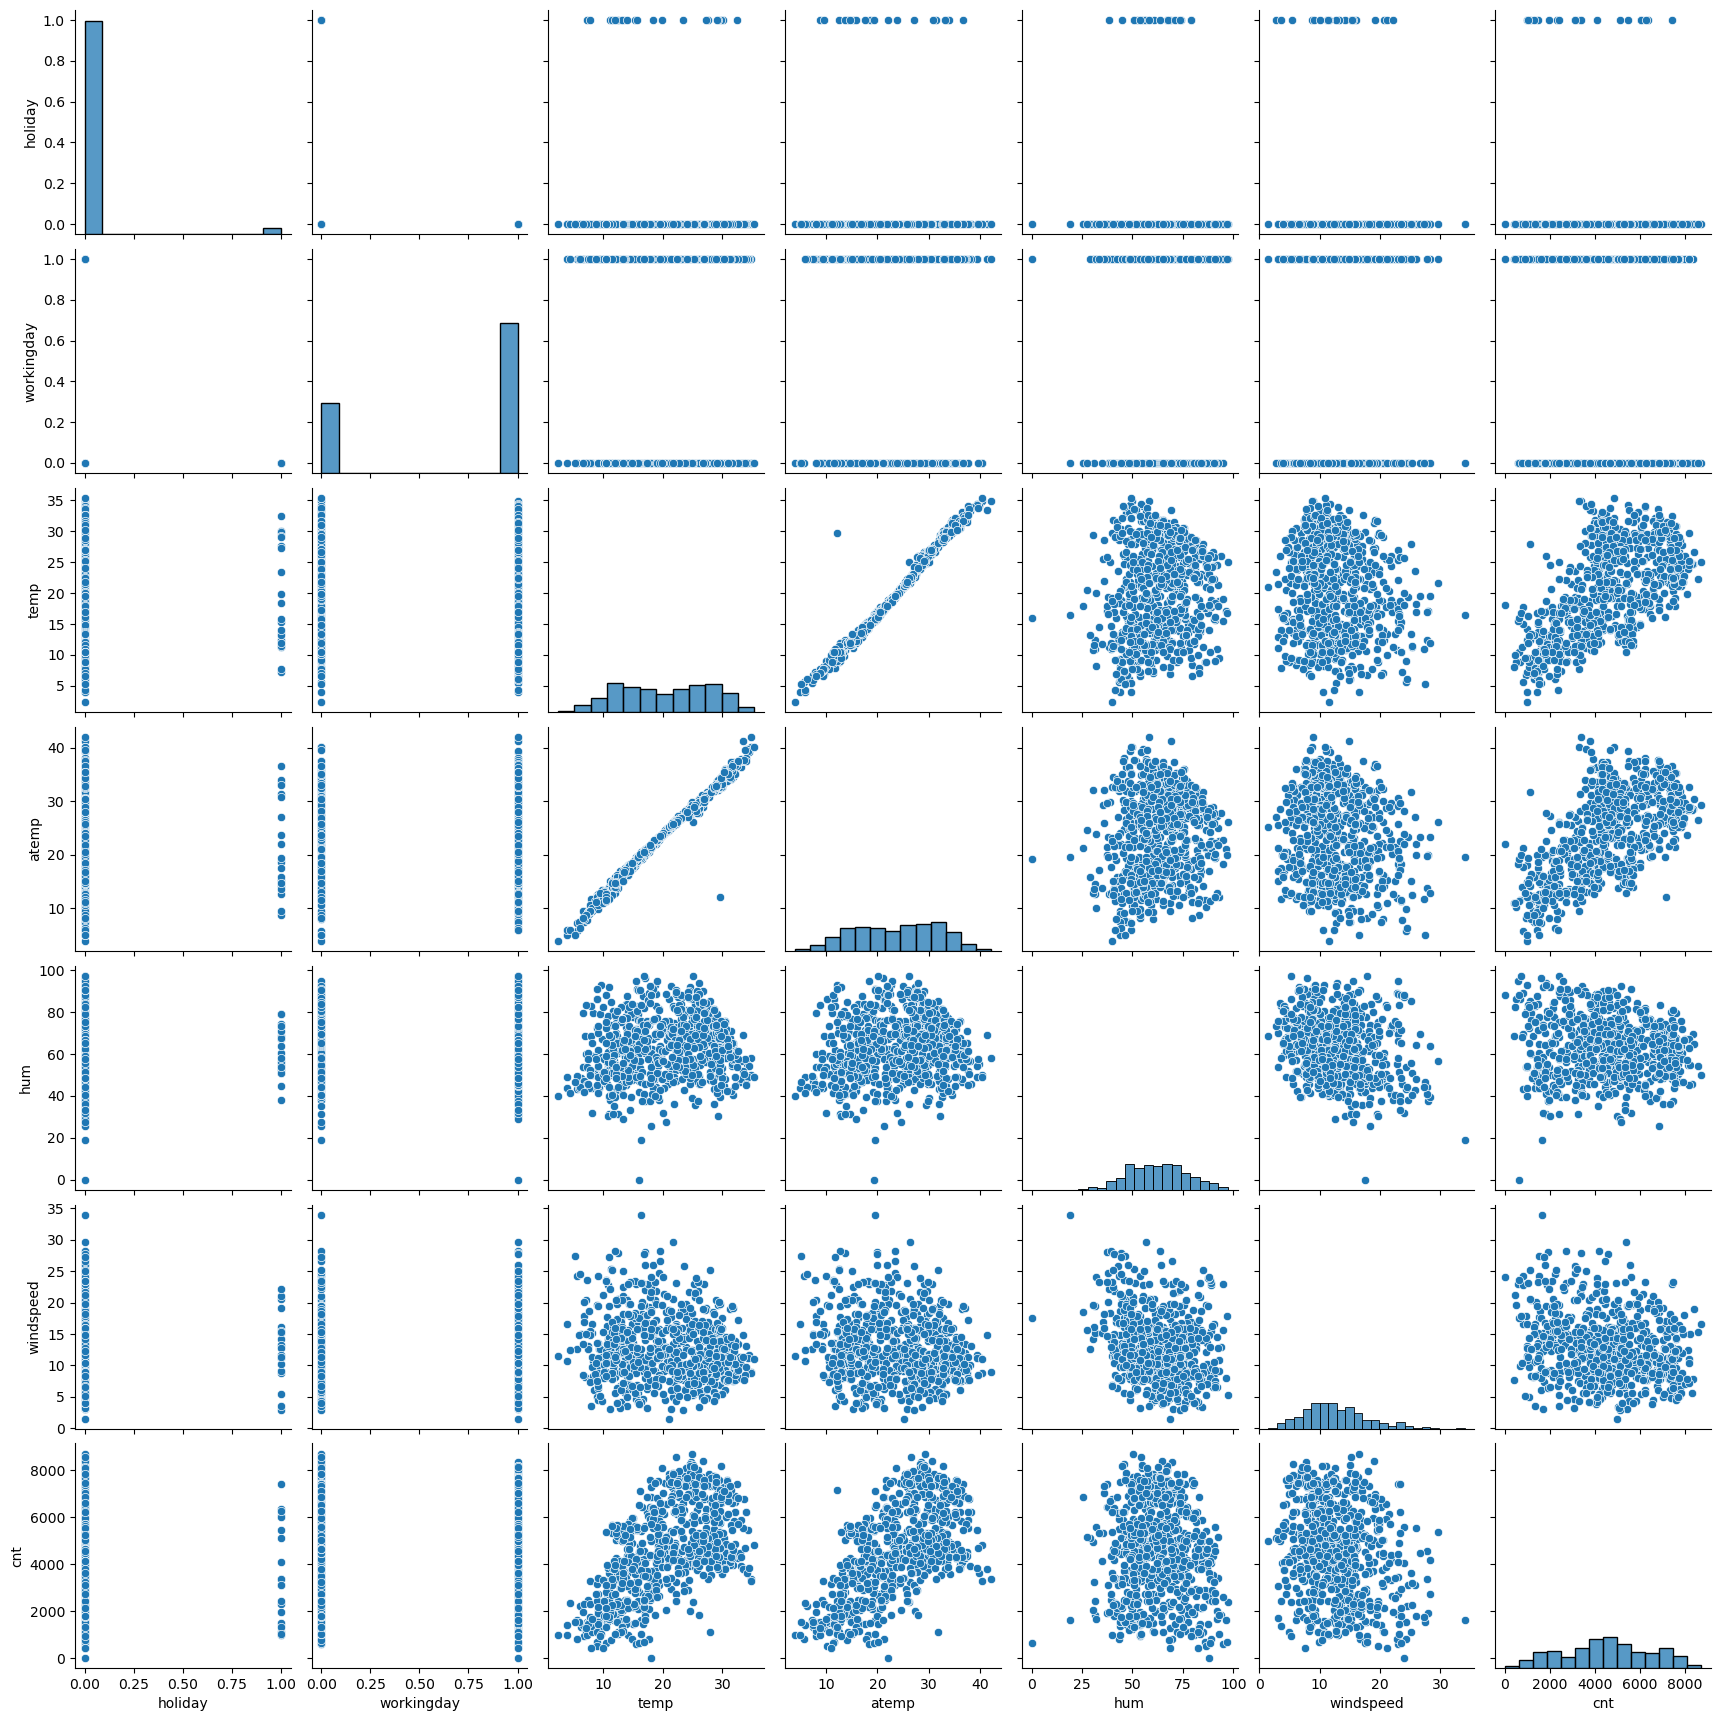

In [10]:
sns.pairplot(dataframe)
plt.show()

#### Few things we can see clearly from scatter plot is that temp and atemp variables are having a linear regression with cnt

#### Let's plot a box plot for categorical variables against target variable cnt

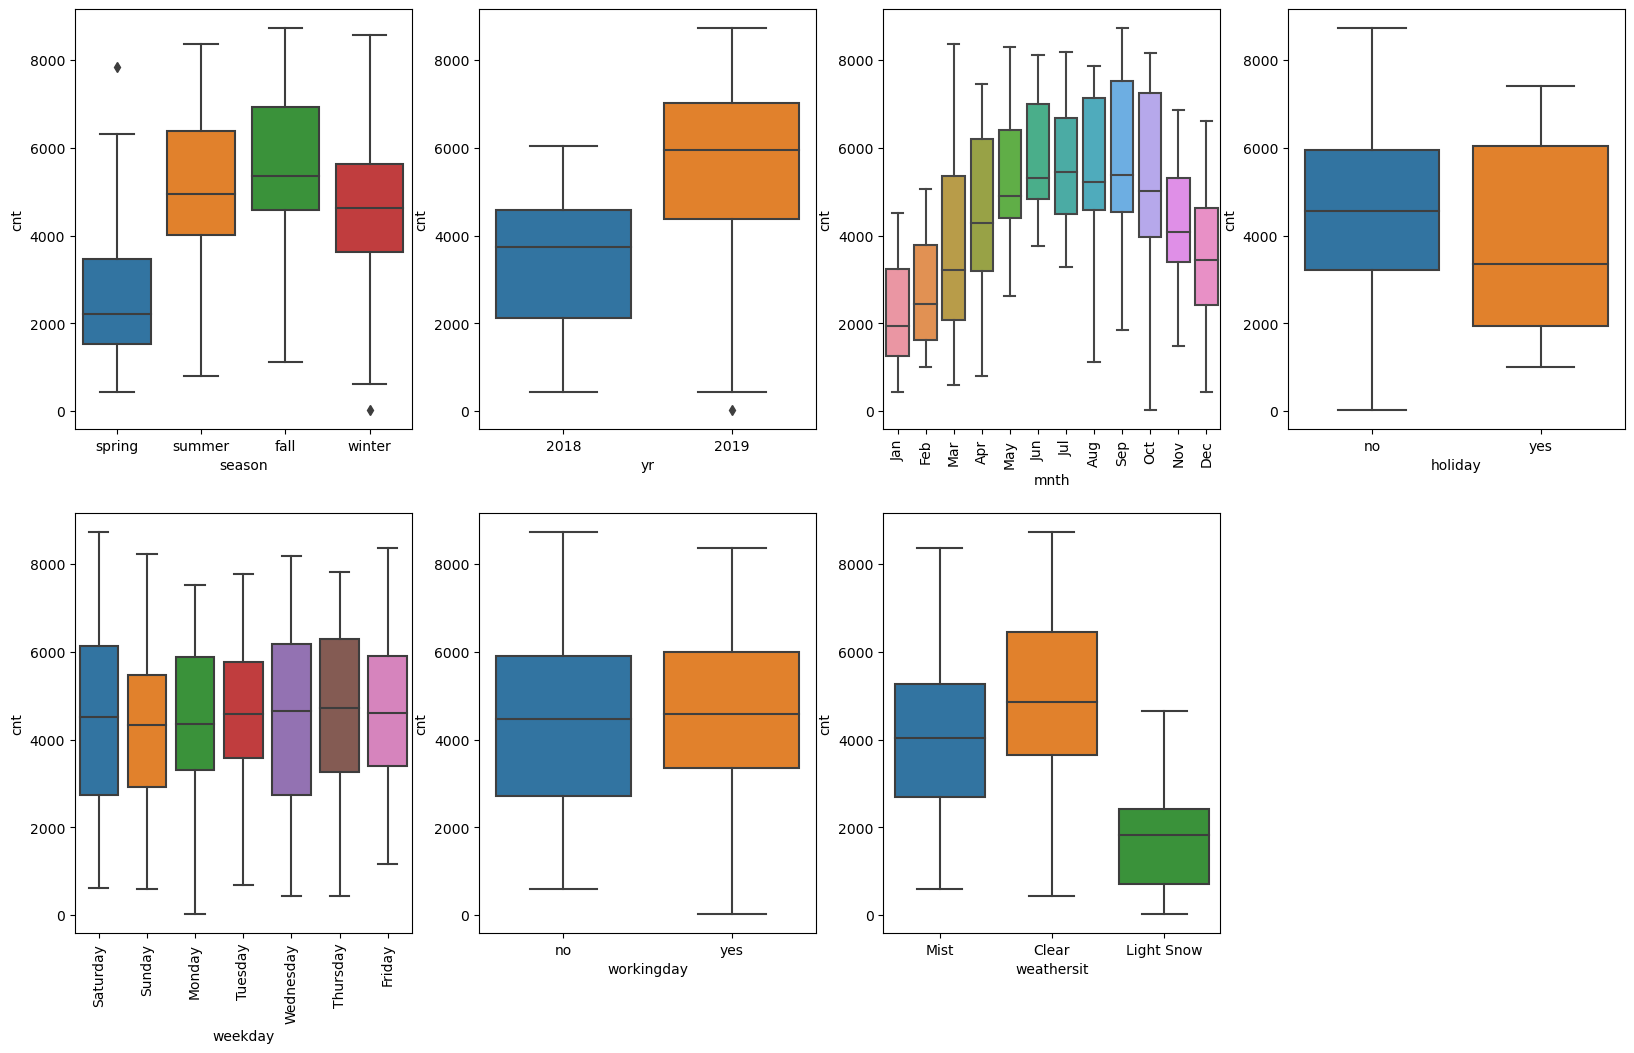

In [11]:
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(x="season",y="cnt",data=dataframe)
plt.subplot(2,4,2)
sns.boxplot(x="yr",y="cnt",data=dataframe)
plt.subplot(2,4,3)
ax1 = sns.boxplot(x="mnth",y="cnt",data=dataframe)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.subplot(2,4,4)
ax2 = sns.boxplot(x="holiday",y="cnt",data=dataframe)
ax2.set_xticklabels(["no","yes"])
plt.subplot(2,4,5)
ax3 = sns.boxplot(x="weekday",y="cnt",data=dataframe)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
plt.subplot(2,4,6)
ax4 = sns.boxplot(x="workingday",y="cnt",data=dataframe)
ax4.set_xticklabels(["no","yes"])
plt.subplot(2,4,7)
sns.boxplot(x="weathersit",y="cnt",data=dataframe)
plt.show()

### Few things that are clear from above boxplots

##### 1. Rentals of bikes went up in year 2019
##### 2. The total number rentals on bikes is higher in Fall, Summer and Winter season than Spring probably because of people being on vacation in spring season
##### 3. People tend to rent bikes more between June to November month
##### 4. Number of rentals is very low in Light Snow compared compared to Mistyy and Clear weather
##### 5. Number of rentals is slightly higher on the holidays
##### 6. Working day plays no role in rentals of the bikes i.e. there is no significant relationship between whether it is a working day or not with the total number of rentals of bike
##### 7. There is no significant relationship between the day of the week with rent of a bike

## Data Preparation
### Let us now convert the categorical variables into dummy variables
season, yr, mnth, weekday, weathersit are all the categorical variables

In [12]:
season_dummy_df = pd.get_dummies(dataframe["season"],drop_first=True,dtype=int)
yr_dummy_df = pd.get_dummies(dataframe["yr"],drop_first=True,dtype=int)
mnth_dummy_df = pd.get_dummies(dataframe["mnth"],drop_first=True,dtype=int)
weekday_dummy_df = pd.get_dummies(dataframe["weekday"],drop_first=True,dtype=int)
weathersit_dummy_df = pd.get_dummies(dataframe["weathersit"],drop_first=True,dtype=int)

dataframe = pd.concat([dataframe,season_dummy_df,yr_dummy_df,mnth_dummy_df,weekday_dummy_df,weathersit_dummy_df], axis=1)
dataframe.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
instant,,,,,,,,,,,,,,,,,,,,,
1,spring,2018,Jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
2,spring,2018,Jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
3,spring,2018,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
4,spring,2018,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
5,spring,2018,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


### Let's now remove the actual categorical variables from dataframe

In [13]:
dataframe.drop(columns=["season","yr","mnth","weekday","weathersit"], inplace=True)
dataframe.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Data splitting and scaling

#### Let us split the dataframe into train and test 70-30 ratio

In [14]:
df_train, df_test = train_test_split(dataframe, train_size=0.75, random_state=100)
print(df_train.shape)
print(df_test.shape)

(547, 30)
(183, 30)


#### Let's work on Scaling the data before building the model

In [15]:
scaler = MinMaxScaler()

#### Declaring the numeric variables that needs to be scaled. Here we will be taking into consideration only the numeric variables and not dummy variables.

In [16]:
numeric_columns_to_scale = ["temp","atemp","hum","windspeed","cnt"]
df_train[numeric_columns_to_scale] = scaler.fit_transform(df_train[numeric_columns_to_scale])
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
instant,,,,,,,,,,,,,,,,,,,,,
312,0,1,0.435124,0.437339,0.743667,0.057471,0.481247,0,0,1,...,0,0,0,0,0,0,1,0,0,0
524,0,1,0.735215,0.680985,0.482181,0.286093,0.887483,0,1,0,...,0,0,0,0,0,0,0,0,0,0
382,0,1,0.391151,0.374375,0.737917,0.659615,0.335136,1,0,0,...,0,0,0,0,0,0,1,0,0,1
414,0,0,0.358285,0.362754,0.550880,0.319514,0.494248,1,0,0,...,0,0,0,1,0,0,0,0,0,0
254,0,0,0.740406,0.695906,0.735509,0.156398,0.578003,0,0,0,...,0,1,0,0,1,0,0,0,0,0


## Building Model

### Let us build model with all the parameters and remove them based on their significance (p value & VIF)


#### Let us create y_train & X_train where y_train has cnt variable which is a target variable and X_train is all other variables together

In [17]:
y_train = df_train.pop("cnt")
X_train = df_train

In [18]:
y_train.head()

instant
312    0.481247
524    0.887483
382    0.335136
414    0.494248
254    0.578003
Name: cnt, dtype: float64

In [19]:
X_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,2019,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
instant,,,,,,,,,,,,,,,,,,,,,
312,0,1,0.435124,0.437339,0.743667,0.057471,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
524,0,1,0.735215,0.680985,0.482181,0.286093,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
382,0,1,0.391151,0.374375,0.737917,0.659615,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
414,0,0,0.358285,0.362754,0.550880,0.319514,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
254,0,0,0.740406,0.695906,0.735509,0.156398,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [20]:
X_train_sm = sm.add_constant(X_train)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     110.2
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          4.86e-198
Time:                        11:23:12   Log-Likelihood:                 570.73
No. Observations:                 547   AIC:                            -1083.
Df Residuals:                     518   BIC:                            -958.6
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2363      0.034      6.936      0.000       0.169       0.303
holiday       -0.0011      0.022     -0.049      0.961      -0.045       0.043
workingday     0.1003      0.012      8.552      0.000       0.077       0.123
temp           0.3916      0.138      2.838      0.005       0.121       0.663
atemp          0.0547      0.136      0.404      0.686      -0.211       0.321
hum           -0.1468      0.037     -3.934      0.000      -0.220      -0.073
windspeed     -0.1773      0.025     -7.069      0.000      -0.227      -0.128
spring        -0.0519      0.028     -1.828      0.068      -0.108       0.004
summer         0.0441      0.025      1.761      0.079      -0.005       0.093
winter         0.1142      0.026      4.341      0.000       0.063       0.166
2019           0.2308      0.008     30.023      0.000       0.216       0.246
Aug            0.0240      0.032      0.739      0.461      -0.040       0.088
Dec           -0.0501      0.032     -1.570      0.117      -0.113       0.013
Feb           -0.0277      0.031     -0.884      0.377      -0.089       0.034
Jan           -0.0554      0.032     -1.720      0.086      -0.119       0.008
Jul           -0.0307      0.034     -0.911      0.363      -0.097       0.036
Jun            0.0135      0.024      0.573      0.567      -0.033       0.060
Mar            0.0053      0.024      0.218      0.827      -0.042       0.053
May            0.0214      0.020      1.048      0.295      -0.019       0.061
Nov           -0.0437      0.035     -1.256      0.210      -0.112       0.025
Oct            0.0096      0.034      0.283      0.777      -0.057       0.076
Sep            0.0865      0.031      2.821      0.005       0.026       0.147
Monday        -0.0233      0.015     -1.582      0.114      -0.052       0.006
Saturday       0.0956      0.013      7.272      0.000       0.070       0.121
Sunday         0.0415      0.013      3.147      0.002       0.016       0.067
Thursday      -0.0106      0.015     -0.707      0.480      -0.040       0.019
Tuesday       -0.0219      0.015     -1.474      0.141      -0.051       0.007
Wednesday     -0.0086      0.015     -0.596      0.551      -0.037       0.020
Light Snow    -0.2595      0.026     -9.971      0.000      -0.311      -0.208
Mist          -0.0598      0.010     -6.002      0.000      -0.079      -0.040
==============================================================================
Omnibus:                       92.397   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.688
Skew:                          -0.821   Prob(JB):                     2.47e-57
Kurtosis:                       5.957   Cond. No.                     2.37e+15
==============================================================================

N

#### Let us calculate VIF of all parameters

In [21]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,86.61
2,temp,68.88
3,atemp,58.61
23,Sunday,19.74
22,Saturday,19.71
6,spring,11.00
8,winter,9.13
7,summer,8.27
19,Oct,6.58
18,Nov,6.51


#### If we go in the order of variables with highest vif, we see that workingday and temp have got highest vif value from top but their p value is almost zero. The third variable with highest vif is atemp and it's p value is also quiet high, let's remove it and calculate p value and vif again

In [22]:
X_train_2 = X_train.drop(columns="atemp")
X_train_sm = sm.add_constant(X_train_2)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     114.4
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          4.88e-199
Time:                        11:23:12   Log-Likelihood:                 570.65
No. Observations:                 547   AIC:                            -1085.
Df Residuals:                     519   BIC:                            -964.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2362      0.034      6.939      0.000       0.169       0.303
holiday       -0.0018      0.022     -0.081      0.935      -0.046       0.042
workingday     0.1002      0.012      8.555      0.000       0.077       0.123
temp           0.4445      0.044     10.169      0.000       0.359       0.530
hum           -0.1461      0.037     -3.923      0.000      -0.219      -0.073
windspeed     -0.1795      0.025     -7.324      0.000      -0.228      -0.131
spring        -0.0515      0.028     -1.816      0.070      -0.107       0.004
summer         0.0446      0.025      1.785      0.075      -0.004       0.094
winter         0.1146      0.026      4.364      0.000       0.063       0.166
2019           0.2307      0.008     30.049      0.000       0.216       0.246
Aug            0.0223      0.032      0.693      0.489      -0.041       0.085
Dec           -0.0501      0.032     -1.572      0.117      -0.113       0.013
Feb           -0.0279      0.031     -0.890      0.374      -0.089       0.034
Jan           -0.0557      0.032     -1.730      0.084      -0.119       0.008
Jul           -0.0318      0.034     -0.946      0.345      -0.098       0.034
Jun            0.0122      0.023      0.525      0.600      -0.034       0.058
Mar            0.0050      0.024      0.208      0.836      -0.042       0.052
May            0.0206      0.020      1.015      0.311      -0.019       0.060
Nov           -0.0438      0.035     -1.259      0.209      -0.112       0.025
Oct            0.0094      0.034      0.277      0.782      -0.057       0.076
Sep            0.0857      0.031      2.804      0.005       0.026       0.146
Monday        -0.0227      0.015     -1.551      0.121      -0.052       0.006
Saturday       0.0960      0.013      7.324      0.000       0.070       0.122
Sunday         0.0418      0.013      3.182      0.002       0.016       0.068
Thursday      -0.0101      0.015     -0.676      0.499      -0.039       0.019
Tuesday       -0.0214      0.015     -1.448      0.148      -0.050       0.008
Wednesday     -0.0083      0.014     -0.574      0.566      -0.037       0.020
Light Snow    -0.2603      0.026    -10.043      0.000      -0.311      -0.209
Mist          -0.0599      0.010     -6.020      0.000      -0.079      -0.040
==============================================================================
Omnibus:                       91.631   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.915
Skew:                          -0.815   Prob(JB):                     9.87e-57
Kurtosis:                       5.942   Cond. No.                     2.29e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [23]:
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,86.61
22,Sunday,19.73
21,Saturday,19.71
5,spring,10.99
7,winter,9.11
6,summer,8.24
2,temp,6.92
18,Oct,6.58
17,Nov,6.51
9,Aug,6.24


In [24]:
#### Let us keep on following the same approach, removing the 

In [25]:
X_train_3 = X_train_2.drop(columns="spring")
X_train_sm = sm.add_constant(X_train_3)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     118.2
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          2.27e-199
Time:                        11:23:12   Log-Likelihood:                 568.92
No. Observations:                 547   AIC:                            -1084.
Df Residuals:                     520   BIC:                            -967.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2094      0.031      6.810      0.000       0.149       0.270
holiday       -0.0096      0.022     -0.433      0.665      -0.053       0.034
workingday     0.0942      0.011      8.364      0.000       0.072       0.116
temp           0.4553      0.043     10.491      0.000       0.370       0.541
hum           -0.1471      0.037     -3.942      0.000      -0.220      -0.074
windspeed     -0.1817      0.025     -7.409      0.000      -0.230      -0.134
summer         0.0737      0.019      3.840      0.000       0.036       0.111
winter         0.1445      0.021      7.036      0.000       0.104       0.185
2019           0.2303      0.008     29.940      0.000       0.215       0.245
Aug            0.0479      0.029      1.653      0.099      -0.009       0.105
Dec           -0.0569      0.032     -1.793      0.074      -0.119       0.005
Feb           -0.0480      0.029     -1.635      0.103      -0.106       0.010
Jan           -0.0751      0.030     -2.468      0.014      -0.135      -0.015
Jul           -0.0069      0.031     -0.224      0.823      -0.067       0.053
Jun            0.0186      0.023      0.804      0.422      -0.027       0.064
Mar           -0.0090      0.023     -0.395      0.693      -0.054       0.036
May            0.0187      0.020      0.921      0.357      -0.021       0.059
Nov           -0.0435      0.035     -1.248      0.212      -0.112       0.025
Oct            0.0080      0.034      0.236      0.814      -0.059       0.075
Sep            0.1056      0.029      3.694      0.000       0.049       0.162
Monday        -0.0221      0.015     -1.509      0.132      -0.051       0.007
Saturday       0.0895      0.013      7.082      0.000       0.065       0.114
Sunday         0.0352      0.013      2.784      0.006       0.010       0.060
Thursday      -0.0100      0.015     -0.666      0.506      -0.039       0.019
Tuesday       -0.0215      0.015     -1.447      0.148      -0.051       0.008
Wednesday     -0.0085      0.015     -0.588      0.556      -0.037       0.020
Light Snow    -0.2578      0.026     -9.938      0.000      -0.309      -0.207
Mist          -0.0599      0.010     -6.002      0.000      -0.079      -0.040
==============================================================================
Omnibus:                       88.728   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.004
Skew:                          -0.799   Prob(JB):                     1.71e-53
Kurtosis:                       5.848   Cond. No.                     2.28e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.23e-28. This might indicate

In [26]:
vif = pd.DataFrame()
vif['Features'] = X_train_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,71.10
21,Sunday,16.09
20,Saturday,16.09
2,temp,6.79
17,Oct,6.58
16,Nov,6.51
9,Dec,5.72
6,winter,5.54
11,Jan,5.37
8,Aug,5.04


In [27]:
X_train_4 = X_train_3.drop(columns="Nov")
X_train_sm = sm.add_constant(X_train_4)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     122.7
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          4.38e-200
Time:                        11:23:12   Log-Likelihood:                 568.10
No. Observations:                 547   AIC:                            -1084.
Df Residuals:                     521   BIC:                            -972.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1901      0.027      7.150      0.000       0.138       0.242
holiday       -0.0173      0.021     -0.819      0.413      -0.059       0.024
workingday     0.0905      0.011      8.329      0.000       0.069       0.112
temp           0.4668      0.042     11.000      0.000       0.383       0.550
hum           -0.1525      0.037     -4.111      0.000      -0.225      -0.080
windspeed     -0.1815      0.025     -7.396      0.000      -0.230      -0.133
summer         0.0873      0.016      5.518      0.000       0.056       0.118
winter         0.1294      0.017      7.791      0.000       0.097       0.162
2019           0.2303      0.008     29.932      0.000       0.215       0.245
Aug            0.0652      0.025      2.560      0.011       0.015       0.115
Dec           -0.0243      0.018     -1.348      0.178      -0.060       0.011
Feb           -0.0252      0.023     -1.096      0.273      -0.070       0.020
Jan           -0.0512      0.024     -2.163      0.031      -0.098      -0.005
Jul            0.0096      0.028      0.345      0.730      -0.045       0.064
Jun            0.0268      0.022      1.209      0.227      -0.017       0.070
Mar            0.0078      0.018      0.420      0.674      -0.029       0.044
May            0.0243      0.020      1.227      0.220      -0.015       0.063
Oct            0.0438      0.018      2.390      0.017       0.008       0.080
Sep            0.1280      0.022      5.746      0.000       0.084       0.172
Monday        -0.0216      0.015     -1.472      0.141      -0.050       0.007
Saturday       0.0856      0.012      6.987      0.000       0.062       0.110
Sunday         0.0313      0.012      2.554      0.011       0.007       0.055
Thursday      -0.0106      0.015     -0.704      0.482      -0.040       0.019
Tuesday       -0.0216      0.015     -1.459      0.145      -0.051       0.008
Wednesday     -0.0088      0.015     -0.607      0.544      -0.037       0.020
Light Snow    -0.2571      0.026     -9.910      0.000      -0.308      -0.206
Mist          -0.0594      0.010     -5.953      0.000      -0.079      -0.040
==============================================================================
Omnibus:                       89.874   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.955
Skew:                          -0.812   Prob(JB):                     1.06e-53
Kurtosis:                       5.840   Cond. No.                     2.28e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.23e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is 

In [28]:
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,54.83
20,Sunday,12.36
19,Saturday,12.36
2,temp,6.49
8,Aug,3.89
12,Jul,3.63
6,winter,3.62
5,summer,3.29
11,Jan,3.25
0,holiday,3.24


In [29]:
X_train_5 = X_train_4.drop(columns="Aug")
X_train_sm = sm.add_constant(X_train_5)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     126.2
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          9.77e-200
Time:                        11:23:12   Log-Likelihood:                 564.68
No. Observations:                 547   AIC:                            -1079.
Df Residuals:                     522   BIC:                            -971.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1961      0.027      7.363      0.000       0.144       0.248
holiday       -0.0207      0.021     -0.977      0.329      -0.062       0.021
workingday     0.0936      0.011      8.625      0.000       0.072       0.115
temp           0.5255      0.036     14.634      0.000       0.455       0.596
hum           -0.1581      0.037     -4.249      0.000      -0.231      -0.085
windspeed     -0.1896      0.024     -7.750      0.000      -0.238      -0.142
summer         0.0675      0.014      4.865      0.000       0.040       0.095
winter         0.1112      0.015      7.368      0.000       0.082       0.141
2019           0.2292      0.008     29.677      0.000       0.214       0.244
Dec           -0.0346      0.018     -1.963      0.050      -0.069    3.21e-05
Feb           -0.0446      0.022     -2.042      0.042      -0.087      -0.002
Jan           -0.0663      0.023     -2.876      0.004      -0.112      -0.021
Jul           -0.0437      0.019     -2.360      0.019      -0.080      -0.007
Jun           -0.0077      0.018     -0.433      0.665      -0.042       0.027
Mar           -0.0119      0.017     -0.707      0.480      -0.045       0.021
May            0.0031      0.018      0.171      0.865      -0.032       0.039
Oct            0.0283      0.017      1.627      0.104      -0.006       0.062
Sep            0.0887      0.016      5.469      0.000       0.057       0.120
Monday        -0.0217      0.015     -1.472      0.142      -0.051       0.007
Saturday       0.0893      0.012      7.299      0.000       0.065       0.113
Sunday         0.0339      0.012      2.758      0.006       0.010       0.058
Thursday      -0.0118      0.015     -0.782      0.434      -0.041       0.018
Tuesday       -0.0227      0.015     -1.523      0.128      -0.052       0.007
Wednesday     -0.0100      0.015     -0.686      0.493      -0.039       0.019
Light Snow    -0.2549      0.026     -9.778      0.000      -0.306      -0.204
Mist          -0.0572      0.010     -5.724      0.000      -0.077      -0.038
==============================================================================
Omnibus:                       84.444   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.829
Skew:                          -0.799   Prob(JB):                     1.22e-45
Kurtosis:                       5.554   Cond. No.                     2.26e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.28e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [30]:
vif = pd.DataFrame()
vif['Features'] = X_train_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,54.24
19,Sunday,12.24
18,Saturday,12.21
2,temp,4.60
0,holiday,3.23
10,Jan,3.05
6,winter,2.96
5,summer,2.50
9,Feb,2.27
3,hum,2.03


In [31]:
X_train_6 = X_train_5.drop(columns="holiday")
X_train_sm = sm.add_constant(X_train_6)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     126.2
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          9.77e-200
Time:                        11:23:12   Log-Likelihood:                 564.68
No. Observations:                 547   AIC:                            -1079.
Df Residuals:                     522   BIC:                            -971.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1753      0.041      4.280      0.000       0.095       0.256
workingday     0.1143      0.024      4.704      0.000       0.067       0.162
temp           0.5255      0.036     14.634      0.000       0.455       0.596
hum           -0.1581      0.037     -4.249      0.000      -0.231      -0.085
windspeed     -0.1896      0.024     -7.750      0.000      -0.238      -0.142
summer         0.0675      0.014      4.865      0.000       0.040       0.095
winter         0.1112      0.015      7.368      0.000       0.082       0.141
2019           0.2292      0.008     29.677      0.000       0.214       0.244
Dec           -0.0346      0.018     -1.963      0.050      -0.069    3.21e-05
Feb           -0.0446      0.022     -2.042      0.042      -0.087      -0.002
Jan           -0.0663      0.023     -2.876      0.004      -0.112      -0.021
Jul           -0.0437      0.019     -2.360      0.019      -0.080      -0.007
Jun           -0.0077      0.018     -0.433      0.665      -0.042       0.027
Mar           -0.0119      0.017     -0.707      0.480      -0.045       0.021
May            0.0031      0.018      0.171      0.865      -0.032       0.039
Oct            0.0283      0.017      1.627      0.104      -0.006       0.062
Sep            0.0887      0.016      5.469      0.000       0.057       0.120
Monday        -0.0217      0.015     -1.472      0.142      -0.051       0.007
Saturday       0.1101      0.028      3.938      0.000       0.055       0.165
Sunday         0.0546      0.028      1.953      0.051      -0.000       0.110
Thursday      -0.0118      0.015     -0.782      0.434      -0.041       0.018
Tuesday       -0.0227      0.015     -1.523      0.128      -0.052       0.007
Wednesday     -0.0100      0.015     -0.686      0.493      -0.039       0.019
Light Snow    -0.2549      0.026     -9.778      0.000      -0.306      -0.204
Mist          -0.0572      0.010     -5.724      0.000      -0.077      -0.038
==============================================================================
Omnibus:                       84.444   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.829
Skew:                          -0.799   Prob(JB):                     1.22e-45
Kurtosis:                       5.554   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
vif = pd.DataFrame()
vif['Features'] = X_train_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_6.values, i) for i in range(X_train_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,35.68
1,temp,24.81
0,workingday,19.07
18,Sunday,5.61
17,Saturday,5.59
3,windspeed,4.74
5,winter,3.52
4,summer,3.13
9,Jan,2.66
23,Mist,2.35


In [33]:
X_train_7 = X_train_6.drop(columns="Sunday")
X_train_sm = sm.add_constant(X_train_7)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     130.8
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          5.56e-200
Time:                        11:23:13   Log-Likelihood:                 562.69
No. Observations:                 547   AIC:                            -1077.
Df Residuals:                     523   BIC:                            -974.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2211      0.034      6.568      0.000       0.155       0.287
workingday     0.0738      0.013      5.817      0.000       0.049       0.099
temp           0.5251      0.036     14.584      0.000       0.454       0.596
hum           -0.1549      0.037     -4.154      0.000      -0.228      -0.082
windspeed     -0.1905      0.025     -7.766      0.000      -0.239      -0.142
summer         0.0682      0.014      4.910      0.000       0.041       0.096
winter         0.1113      0.015      7.357      0.000       0.082       0.141
2019           0.2293      0.008     29.616      0.000       0.214       0.245
Dec           -0.0349      0.018     -1.976      0.049      -0.070      -0.000
Feb           -0.0444      0.022     -2.029      0.043      -0.087      -0.001
Jan           -0.0668      0.023     -2.888      0.004      -0.112      -0.021
Jul           -0.0420      0.019     -2.266      0.024      -0.078      -0.006
Jun           -0.0060      0.018     -0.340      0.734      -0.041       0.029
Mar           -0.0104      0.017     -0.615      0.539      -0.044       0.023
May            0.0038      0.018      0.210      0.834      -0.032       0.039
Oct            0.0292      0.017      1.676      0.094      -0.005       0.063
Sep            0.0881      0.016      5.422      0.000       0.056       0.120
Monday        -0.0345      0.013     -2.601      0.010      -0.061      -0.008
Saturday       0.0621      0.013      4.633      0.000       0.036       0.088
Thursday      -0.0204      0.014     -1.410      0.159      -0.049       0.008
Tuesday       -0.0308      0.014     -2.146      0.032      -0.059      -0.003
Wednesday     -0.0176      0.014     -1.249      0.212      -0.045       0.010
Light Snow    -0.2543      0.026     -9.729      0.000      -0.306      -0.203
Mist          -0.0577      0.010     -5.758      0.000      -0.077      -0.038
==============================================================================
Omnibus:                       91.152   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.495
Skew:                          -0.850   Prob(JB):                     2.41e-50
Kurtosis:                       5.671   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
vif = pd.DataFrame()
vif['Features'] = X_train_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_7.values, i) for i in range(X_train_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,30.46
1,temp,22.12
0,workingday,7.32
3,windspeed,4.44
5,winter,3.31
4,summer,3.00
9,Jan,2.35
22,Mist,2.29
6,2019,2.11
20,Wednesday,2.10


In [35]:
X_train_8 = X_train_7.drop(columns="May")
X_train_sm = sm.add_constant(X_train_8)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     137.0
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          4.80e-201
Time:                        11:23:13   Log-Likelihood:                 562.66
No. Observations:                 547   AIC:                            -1079.
Df Residuals:                     524   BIC:                            -980.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2205      0.033      6.583      0.000       0.155       0.286
workingday     0.0738      0.013      5.824      0.000       0.049       0.099
temp           0.5263      0.036     14.820      0.000       0.456       0.596
hum           -0.1542      0.037     -4.155      0.000      -0.227      -0.081
windspeed     -0.1908      0.024     -7.805      0.000      -0.239      -0.143
summer         0.0696      0.012      5.721      0.000       0.046       0.094
winter         0.1113      0.015      7.361      0.000       0.082       0.141
2019           0.2292      0.008     29.704      0.000       0.214       0.244
Dec           -0.0349      0.018     -1.976      0.049      -0.070      -0.000
Feb           -0.0443      0.022     -2.025      0.043      -0.087      -0.001
Jan           -0.0666      0.023     -2.884      0.004      -0.112      -0.021
Jul           -0.0426      0.018     -2.331      0.020      -0.079      -0.007
Jun           -0.0075      0.016     -0.457      0.648      -0.040       0.025
Mar           -0.0109      0.017     -0.650      0.516      -0.044       0.022
Oct            0.0290      0.017      1.668      0.096      -0.005       0.063
Sep            0.0876      0.016      5.449      0.000       0.056       0.119
Monday        -0.0346      0.013     -2.609      0.009      -0.061      -0.009
Saturday       0.0621      0.013      4.634      0.000       0.036       0.088
Thursday      -0.0204      0.014     -1.413      0.158      -0.049       0.008
Tuesday       -0.0308      0.014     -2.147      0.032      -0.059      -0.003
Wednesday     -0.0176      0.014     -1.249      0.212      -0.045       0.010
Light Snow    -0.2546      0.026     -9.759      0.000      -0.306      -0.203
Mist          -0.0577      0.010     -5.774      0.000      -0.077      -0.038
==============================================================================
Omnibus:                       90.724   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.109
Skew:                          -0.848   Prob(JB):                     7.96e-50
Kurtosis:                       5.654   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
vif = pd.DataFrame()
vif['Features'] = X_train_8.columns
vif['VIF'] = [variance_inflation_factor(X_train_8.values, i) for i in range(X_train_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,30.40
1,temp,21.75
0,workingday,7.32
3,windspeed,4.37
5,winter,3.30
9,Jan,2.35
4,summer,2.31
21,Mist,2.28
6,2019,2.10
19,Wednesday,2.10


In [37]:
X_train_9 = X_train_8.drop(columns="Mar")
X_train_sm = sm.add_constant(X_train_9)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     143.7
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          4.88e-202
Time:                        11:23:13   Log-Likelihood:                 562.44
No. Observations:                 547   AIC:                            -1081.
Df Residuals:                     525   BIC:                            -986.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2112      0.030      6.974      0.000       0.152       0.271
workingday     0.0734      0.013      5.802      0.000       0.049       0.098
temp           0.5376      0.031     17.383      0.000       0.477       0.598
hum           -0.1554      0.037     -4.195      0.000      -0.228      -0.083
windspeed     -0.1913      0.024     -7.830      0.000      -0.239      -0.143
summer         0.0720      0.012      6.198      0.000       0.049       0.095
winter         0.1156      0.014      8.512      0.000       0.089       0.142
2019           0.2290      0.008     29.723      0.000       0.214       0.244
Dec           -0.0308      0.016     -1.868      0.062      -0.063       0.002
Feb           -0.0371      0.019     -1.967      0.050      -0.074   -4.98e-05
Jan           -0.0584      0.019     -3.012      0.003      -0.097      -0.020
Jul           -0.0418      0.018     -2.292      0.022      -0.078      -0.006
Jun           -0.0072      0.016     -0.441      0.660      -0.039       0.025
Oct            0.0293      0.017      1.687      0.092      -0.005       0.063
Sep            0.0894      0.016      5.646      0.000       0.058       0.121
Monday        -0.0346      0.013     -2.611      0.009      -0.061      -0.009
Saturday       0.0616      0.013      4.610      0.000       0.035       0.088
Thursday      -0.0207      0.014     -1.437      0.151      -0.049       0.008
Tuesday       -0.0308      0.014     -2.146      0.032      -0.059      -0.003
Wednesday     -0.0176      0.014     -1.252      0.211      -0.045       0.010
Light Snow    -0.2543      0.026     -9.756      0.000      -0.306      -0.203
Mist          -0.0575      0.010     -5.758      0.000      -0.077      -0.038
==============================================================================
Omnibus:                       89.163   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.582
Skew:                          -0.845   Prob(JB):                     1.54e-47
Kurtosis:                       5.570   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
vif = pd.DataFrame()
vif['Features'] = X_train_9.columns
vif['VIF'] = [variance_inflation_factor(X_train_9.values, i) for i in range(X_train_9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,26.32
1,temp,19.11
0,workingday,7.19
3,windspeed,4.06
5,winter,2.95
20,Mist,2.22
4,summer,2.22
18,Wednesday,2.10
6,2019,2.08
9,Jan,1.96


In [39]:
X_train_10 = X_train_9.drop(columns="Wednesday")
X_train_sm = sm.add_constant(X_train_10)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     150.6
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          8.54e-203
Time:                        11:23:13   Log-Likelihood:                 561.63
No. Observations:                 547   AIC:                            -1081.
Df Residuals:                     526   BIC:                            -990.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2113      0.030      6.973      0.000       0.152       0.271
workingday     0.0655      0.011      5.971      0.000       0.044       0.087
temp           0.5374      0.031     17.368      0.000       0.477       0.598
hum           -0.1569      0.037     -4.236      0.000      -0.230      -0.084
windspeed     -0.1914      0.024     -7.834      0.000      -0.239      -0.143
summer         0.0718      0.012      6.178      0.000       0.049       0.095
winter         0.1149      0.014      8.464      0.000       0.088       0.142
2019           0.2287      0.008     29.685      0.000       0.214       0.244
Dec           -0.0301      0.016     -1.823      0.069      -0.062       0.002
Feb           -0.0375      0.019     -1.986      0.048      -0.075      -0.000
Jan           -0.0590      0.019     -3.039      0.002      -0.097      -0.021
Jul           -0.0409      0.018     -2.243      0.025      -0.077      -0.005
Jun           -0.0073      0.016     -0.449      0.654      -0.039       0.025
Oct            0.0300      0.017      1.730      0.084      -0.004       0.064
Sep            0.0890      0.016      5.618      0.000       0.058       0.120
Monday        -0.0265      0.012     -2.290      0.022      -0.049      -0.004
Saturday       0.0628      0.013      4.706      0.000       0.037       0.089
Thursday      -0.0117      0.013     -0.939      0.348      -0.036       0.013
Tuesday       -0.0218      0.012     -1.754      0.080      -0.046       0.003
Light Snow    -0.2565      0.026     -9.856      0.000      -0.308      -0.205
Mist          -0.0569      0.010     -5.698      0.000      -0.076      -0.037
==============================================================================
Omnibus:                       88.348   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.096
Skew:                          -0.839   Prob(JB):                     5.33e-47
Kurtosis:                       5.557   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
vif = pd.DataFrame()
vif['Features'] = X_train_10.columns
vif['VIF'] = [variance_inflation_factor(X_train_10.values, i) for i in range(X_train_10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,26.28
1,temp,19.11
0,workingday,5.32
3,windspeed,4.06
5,winter,2.95
19,Mist,2.22
4,summer,2.22
6,2019,2.08
9,Jan,1.96
12,Oct,1.85


In [41]:
X_train_11 = X_train_10.drop(columns="Thursday")
X_train_sm = sm.add_constant(X_train_11)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     158.6
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.04e-203
Time:                        11:23:13   Log-Likelihood:                 561.17
No. Observations:                 547   AIC:                            -1082.
Df Residuals:                     527   BIC:                            -996.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2099      0.030      6.936      0.000       0.150       0.269
workingday     0.0626      0.011      5.953      0.000       0.042       0.083
temp           0.5377      0.031     17.379      0.000       0.477       0.598
hum           -0.1562      0.037     -4.219      0.000      -0.229      -0.083
windspeed     -0.1917      0.024     -7.845      0.000      -0.240      -0.144
summer         0.0721      0.012      6.211      0.000       0.049       0.095
winter         0.1146      0.014      8.445      0.000       0.088       0.141
2019           0.2287      0.008     29.682      0.000       0.214       0.244
Dec           -0.0299      0.016     -1.815      0.070      -0.062       0.002
Feb           -0.0368      0.019     -1.951      0.052      -0.074       0.000
Jan           -0.0588      0.019     -3.030      0.003      -0.097      -0.021
Jul           -0.0405      0.018     -2.221      0.027      -0.076      -0.005
Jun           -0.0073      0.016     -0.446      0.656      -0.039       0.025
Oct            0.0308      0.017      1.777      0.076      -0.003       0.065
Sep            0.0887      0.016      5.599      0.000       0.058       0.120
Monday        -0.0233      0.011     -2.107      0.036      -0.045      -0.002
Saturday       0.0635      0.013      4.762      0.000       0.037       0.090
Tuesday       -0.0183      0.012     -1.543      0.123      -0.042       0.005
Light Snow    -0.2568      0.026     -9.872      0.000      -0.308      -0.206
Mist          -0.0565      0.010     -5.669      0.000      -0.076      -0.037
==============================================================================
Omnibus:                       90.067   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.046
Skew:                          -0.849   Prob(JB):                     1.65e-48
Kurtosis:                       5.602   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
vif = pd.DataFrame()
vif['Features'] = X_train_11.columns
vif['VIF'] = [variance_inflation_factor(X_train_11.values, i) for i in range(X_train_11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,26.27
1,temp,19.11
0,workingday,4.81
3,windspeed,4.05
5,winter,2.95
4,summer,2.22
18,Mist,2.21
6,2019,2.08
9,Jan,1.96
12,Oct,1.84


In [43]:
X_train_12 = X_train_11.drop(columns="Jun")
X_train_sm = sm.add_constant(X_train_12)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     167.6
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          8.70e-205
Time:                        11:23:13   Log-Likelihood:                 561.07
No. Observations:                 547   AIC:                            -1084.
Df Residuals:                     528   BIC:                            -1002.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2101      0.030      6.949      0.000       0.151       0.269
workingday     0.0627      0.010      5.976      0.000       0.042       0.083
temp           0.5324      0.029     18.611      0.000       0.476       0.589
hum           -0.1533      0.036     -4.210      0.000      -0.225      -0.082
windspeed     -0.1909      0.024     -7.839      0.000      -0.239      -0.143
summer         0.0712      0.011      6.243      0.000       0.049       0.094
winter         0.1143      0.014      8.439      0.000       0.088       0.141
2019           0.2288      0.008     29.759      0.000       0.214       0.244
Dec           -0.0305      0.016     -1.859      0.064      -0.063       0.002
Feb           -0.0376      0.019     -2.005      0.045      -0.074      -0.001
Jan           -0.0601      0.019     -3.130      0.002      -0.098      -0.022
Jul           -0.0384      0.018     -2.182      0.030      -0.073      -0.004
Oct            0.0313      0.017      1.808      0.071      -0.003       0.065
Sep            0.0898      0.016      5.740      0.000       0.059       0.121
Monday        -0.0233      0.011     -2.111      0.035      -0.045      -0.002
Saturday       0.0636      0.013      4.773      0.000       0.037       0.090
Tuesday       -0.0181      0.012     -1.528      0.127      -0.041       0.005
Light Snow    -0.2575      0.026     -9.923      0.000      -0.309      -0.207
Mist          -0.0567      0.010     -5.695      0.000      -0.076      -0.037
==============================================================================
Omnibus:                       90.760   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.611
Skew:                          -0.854   Prob(JB):                     4.58e-49
Kurtosis:                       5.617   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train_12.columns
vif['VIF'] = [variance_inflation_factor(X_train_12.values, i) for i in range(X_train_12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,hum,24.80
1,temp,15.96
0,workingday,4.81
3,windspeed,4.02
5,winter,2.94
17,Mist,2.21
4,summer,2.14
6,2019,2.07
9,Jan,1.92
11,Oct,1.83


In [45]:
X_train_13 = X_train_12.drop(columns="Tuesday")
X_train_sm = sm.add_constant(X_train_13)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     176.9
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          2.05e-205
Time:                        11:23:13   Log-Likelihood:                 559.86
No. Observations:                 547   AIC:                            -1084.
Df Residuals:                     529   BIC:                            -1006.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2118      0.030      7.002      0.000       0.152       0.271
workingday     0.0588      0.010      5.771      0.000       0.039       0.079
temp           0.5325      0.029     18.591      0.000       0.476       0.589
hum           -0.1558      0.036     -4.277      0.000      -0.227      -0.084
windspeed     -0.1920      0.024     -7.875      0.000      -0.240      -0.144
summer         0.0706      0.011      6.191      0.000       0.048       0.093
winter         0.1135      0.014      8.374      0.000       0.087       0.140
2019           0.2287      0.008     29.703      0.000       0.214       0.244
Dec           -0.0301      0.016     -1.830      0.068      -0.062       0.002
Feb           -0.0386      0.019     -2.058      0.040      -0.075      -0.002
Jan           -0.0603      0.019     -3.138      0.002      -0.098      -0.023
Jul           -0.0396      0.018     -2.252      0.025      -0.074      -0.005
Oct            0.0312      0.017      1.800      0.072      -0.003       0.065
Sep            0.0900      0.016      5.750      0.000       0.059       0.121
Monday        -0.0194      0.011     -1.802      0.072      -0.041       0.002
Saturday       0.0640      0.013      4.806      0.000       0.038       0.090
Light Snow    -0.2550      0.026     -9.835      0.000      -0.306      -0.204
Mist          -0.0563      0.010     -5.653      0.000      -0.076      -0.037
==============================================================================
Omnibus:                       91.992   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.205
Skew:                          -0.857   Prob(JB):                     6.23e-51
Kurtosis:                       5.685   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
vif = pd.DataFrame()
vif['Features'] = X_train_13.columns
vif['VIF'] = [variance_inflation_factor(X_train_13.values, i) for i in range(X_train_13.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,24.79
1,temp,15.95
0,workingday,4.53
3,windspeed,4.02
5,winter,2.94
16,Mist,2.21
4,summer,2.14
6,2019,2.07
9,Jan,1.92
11,Oct,1.83


In [47]:
X_train_14 = X_train_13.drop(columns="Dec")
X_train_sm = sm.add_constant(X_train_14)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     186.9
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          7.77e-206
Time:                        11:23:14   Log-Likelihood:                 558.13
No. Observations:                 547   AIC:                            -1082.
Df Residuals:                     530   BIC:                            -1009.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2003      0.030      6.755      0.000       0.142       0.258
workingday     0.0588      0.010      5.752      0.000       0.039       0.079
temp           0.5512      0.027     20.553      0.000       0.499       0.604
hum           -0.1644      0.036     -4.542      0.000      -0.236      -0.093
windspeed     -0.1891      0.024     -7.757      0.000      -0.237      -0.141
summer         0.0756      0.011      6.814      0.000       0.054       0.097
winter         0.1110      0.014      8.215      0.000       0.084       0.138
2019           0.2281      0.008     29.588      0.000       0.213       0.243
Feb           -0.0286      0.018     -1.591      0.112      -0.064       0.007
Jan           -0.0484      0.018     -2.671      0.008      -0.084      -0.013
Jul           -0.0393      0.018     -2.232      0.026      -0.074      -0.005
Oct            0.0403      0.017      2.427      0.016       0.008       0.073
Sep            0.0945      0.016      6.097      0.000       0.064       0.125
Monday        -0.0195      0.011     -1.810      0.071      -0.041       0.002
Saturday       0.0635      0.013      4.755      0.000       0.037       0.090
Light Snow    -0.2518      0.026     -9.710      0.000      -0.303      -0.201
Mist          -0.0553      0.010     -5.547      0.000      -0.075      -0.036
==============================================================================
Omnibus:                       89.147   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.914
Skew:                          -0.839   Prob(JB):                     2.91e-48
Kurtosis:                       5.605   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
vif = pd.DataFrame()
vif['Features'] = X_train_14.columns
vif['VIF'] = [variance_inflation_factor(X_train_14.values, i) for i in range(X_train_14.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,21.85
1,temp,14.49
0,workingday,4.51
3,windspeed,4.01
5,winter,2.86
15,Mist,2.17
6,2019,2.06
4,summer,2.05
13,Saturday,1.78
8,Jan,1.76


In [49]:
X_train_15 = X_train_14.drop(columns="Monday")
X_train_sm = sm.add_constant(X_train_15)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     198.3
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          2.75e-206
Time:                        11:23:14   Log-Likelihood:                 556.45
No. Observations:                 547   AIC:                            -1081.
Df Residuals:                     531   BIC:                            -1012.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1992      0.030      6.707      0.000       0.141       0.258
workingday     0.0570      0.010      5.591      0.000       0.037       0.077
temp           0.5533      0.027     20.608      0.000       0.501       0.606
hum           -0.1665      0.036     -4.593      0.000      -0.238      -0.095
windspeed     -0.1906      0.024     -7.807      0.000      -0.239      -0.143
summer         0.0753      0.011      6.773      0.000       0.053       0.097
winter         0.1108      0.014      8.181      0.000       0.084       0.137
2019           0.2276      0.008     29.479      0.000       0.212       0.243
Feb           -0.0284      0.018     -1.577      0.115      -0.064       0.007
Jan           -0.0491      0.018     -2.705      0.007      -0.085      -0.013
Jul           -0.0399      0.018     -2.258      0.024      -0.075      -0.005
Oct            0.0400      0.017      2.400      0.017       0.007       0.073
Sep            0.0943      0.016      6.072      0.000       0.064       0.125
Saturday       0.0656      0.013      4.925      0.000       0.039       0.092
Light Snow    -0.2506      0.026     -9.647      0.000      -0.302      -0.200
Mist          -0.0551      0.010     -5.511      0.000      -0.075      -0.035
==============================================================================
Omnibus:                       88.289   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.279
Skew:                          -0.831   Prob(JB):                     6.58e-48
Kurtosis:                       5.602   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
vif = pd.DataFrame()
vif['Features'] = X_train_15.columns
vif['VIF'] = [variance_inflation_factor(X_train_15.values, i) for i in range(X_train_15.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,hum,21.76
1,temp,14.47
0,workingday,4.46
3,windspeed,4.00
5,winter,2.86
14,Mist,2.17
6,2019,2.06
4,summer,2.05
8,Jan,1.76
12,Saturday,1.76


In [51]:
X_train_16 = X_train_15.drop(columns="Feb")
X_train_sm = sm.add_constant(X_train_16)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     211.7
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          6.39e-207
Time:                        11:23:14   Log-Likelihood:                 555.17
No. Observations:                 547   AIC:                            -1080.
Df Residuals:                     532   BIC:                            -1016.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1842      0.028      6.539      0.000       0.129       0.240
workingday     0.0575      0.010      5.636      0.000       0.037       0.078
temp           0.5713      0.024     23.473      0.000       0.524       0.619
hum           -0.1684      0.036     -4.641      0.000      -0.240      -0.097
windspeed     -0.1917      0.024     -7.842      0.000      -0.240      -0.144
summer         0.0812      0.011      7.723      0.000       0.061       0.102
winter         0.1197      0.012      9.708      0.000       0.095       0.144
2019           0.2268      0.008     29.396      0.000       0.212       0.242
Jan           -0.0365      0.016     -2.237      0.026      -0.069      -0.004
Jul           -0.0390      0.018     -2.204      0.028      -0.074      -0.004
Oct            0.0380      0.017      2.288      0.023       0.005       0.071
Sep            0.0963      0.016      6.209      0.000       0.066       0.127
Saturday       0.0664      0.013      4.978      0.000       0.040       0.093
Light Snow    -0.2497      0.026     -9.601      0.000      -0.301      -0.199
Mist          -0.0550      0.010     -5.495      0.000      -0.075      -0.035
==============================================================================
Omnibus:                       82.847   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.832
Skew:                          -0.790   Prob(JB):                     4.05e-44
Kurtosis:                       5.505   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train_16.columns
vif['VIF'] = [variance_inflation_factor(X_train_16.values, i) for i in range(X_train_16.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,hum,18.90
1,temp,12.73
0,workingday,4.44
3,windspeed,3.77
5,winter,2.49
13,Mist,2.14
6,2019,2.03
4,summer,1.87
11,Saturday,1.76
9,Oct,1.66


In [53]:
X_train_17 = X_train_16.drop(columns="Oct")
X_train_sm = sm.add_constant(X_train_17)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     225.8
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          5.58e-207
Time:                        11:23:14   Log-Likelihood:                 552.49
No. Observations:                 547   AIC:                            -1077.
Df Residuals:                     533   BIC:                            -1017.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1769      0.028      6.295      0.000       0.122       0.232
workingday     0.0567      0.010      5.540      0.000       0.037       0.077
temp           0.5829      0.024     24.382      0.000       0.536       0.630
hum           -0.1666      0.036     -4.573      0.000      -0.238      -0.095
windspeed     -0.1885      0.025     -7.695      0.000      -0.237      -0.140
summer         0.0797      0.011      7.568      0.000       0.059       0.100
winter         0.1337      0.011     12.454      0.000       0.113       0.155
2019           0.2266      0.008     29.256      0.000       0.211       0.242
Jan           -0.0335      0.016     -2.049      0.041      -0.066      -0.001
Jul           -0.0431      0.018     -2.443      0.015      -0.078      -0.008
Sep            0.0904      0.015      5.887      0.000       0.060       0.121
Saturday       0.0660      0.013      4.926      0.000       0.040       0.092
Light Snow    -0.2437      0.026     -9.381      0.000      -0.295      -0.193
Mist          -0.0543      0.010     -5.410      0.000      -0.074      -0.035
==============================================================================
Omnibus:                       73.737   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.511
Skew:                          -0.726   Prob(JB):                     2.56e-37
Kurtosis:                       5.299   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif = pd.DataFrame()
vif['Features'] = X_train_17.columns
vif['VIF'] = [variance_inflation_factor(X_train_17.values, i) for i in range(X_train_17.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,18.75
1,temp,12.30
0,workingday,4.42
3,windspeed,3.77
12,Mist,2.13
6,2019,2.03
5,winter,1.90
4,summer,1.86
10,Saturday,1.76
7,Jan,1.53


In [55]:
X_train_18 = X_train_17.drop(columns="Jan")
X_train_sm = sm.add_constant(X_train_18)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     242.8
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          2.82e-207
Time:                        11:23:14   Log-Likelihood:                 550.35
No. Observations:                 547   AIC:                            -1075.
Df Residuals:                     534   BIC:                            -1019.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1615      0.027      5.947      0.000       0.108       0.215
workingday     0.0564      0.010      5.498      0.000       0.036       0.077
temp           0.6049      0.021     28.248      0.000       0.563       0.647
hum           -0.1718      0.036     -4.713      0.000      -0.243      -0.100
windspeed     -0.1852      0.025     -7.553      0.000      -0.233      -0.137
summer         0.0845      0.010      8.211      0.000       0.064       0.105
winter         0.1419      0.010     14.179      0.000       0.122       0.162
2019           0.2260      0.008     29.109      0.000       0.211       0.241
Jul           -0.0440      0.018     -2.487      0.013      -0.079      -0.009
Sep            0.0917      0.015      5.962      0.000       0.061       0.122
Saturday       0.0658      0.013      4.900      0.000       0.039       0.092
Light Snow    -0.2408      0.026     -9.255      0.000      -0.292      -0.190
Mist          -0.0542      0.010     -5.378      0.000      -0.074      -0.034
==============================================================================
Omnibus:                       71.618   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.413
Skew:                          -0.709   Prob(JB):                     5.40e-36
Kurtosis:                       5.262   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif = pd.DataFrame()
vif['Features'] = X_train_18.columns
vif['VIF'] = [variance_inflation_factor(X_train_18.values, i) for i in range(X_train_18.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,15.71
1,temp,10.26
0,workingday,4.38
3,windspeed,3.74
11,Mist,2.10
6,2019,2.02
4,summer,1.77
9,Saturday,1.75
5,winter,1.67
7,Jul,1.52


In [57]:
X_train_19 = X_train_18.drop(columns="Jul")
X_train_sm = sm.add_constant(X_train_19)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     261.8
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          3.64e-207
Time:                        11:23:14   Log-Likelihood:                 547.20
No. Observations:                 547   AIC:                            -1070.
Df Residuals:                     535   BIC:                            -1019.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1613      0.027      5.907      0.000       0.108       0.215
workingday     0.0571      0.010      5.533      0.000       0.037       0.077
temp           0.5807      0.019     30.310      0.000       0.543       0.618
hum           -0.1641      0.036     -4.498      0.000      -0.236      -0.092
windspeed     -0.1828      0.025     -7.425      0.000      -0.231      -0.134
summer         0.0928      0.010      9.486      0.000       0.074       0.112
winter         0.1460      0.010     14.726      0.000       0.127       0.165
2019           0.2266      0.008     29.074      0.000       0.211       0.242
Sep            0.1013      0.015      6.772      0.000       0.072       0.131
Saturday       0.0658      0.013      4.880      0.000       0.039       0.092
Light Snow    -0.2443      0.026     -9.359      0.000      -0.296      -0.193
Mist          -0.0544      0.010     -5.371      0.000      -0.074      -0.034
==============================================================================
Omnibus:                       78.820   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.166
Skew:                          -0.774   Prob(JB):                     1.24e-39
Kurtosis:                       5.338   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif = pd.DataFrame()
vif['Features'] = X_train_19.columns
vif['VIF'] = [variance_inflation_factor(X_train_19.values, i) for i in range(X_train_19.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,15.44
1,temp,8.06
0,workingday,4.38
3,windspeed,3.73
10,Mist,2.10
6,2019,2.01
8,Saturday,1.75
5,winter,1.62
4,summer,1.58
7,Sep,1.21


### Residual Analysis of the train data

In [59]:
y_train_pred = lm1.predict(X_train_sm)

Text(0.5, 0, 'Errors')

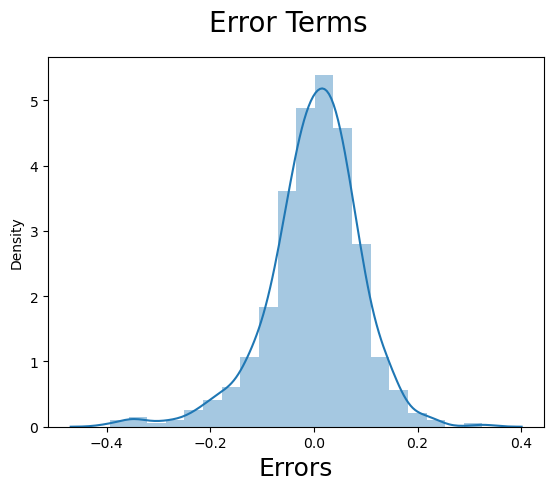

In [60]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

### Making Predictions Using the Final Model

In [61]:
numeric_columns_to_scale = ["temp","atemp","hum","windspeed","cnt"]
df_test[numeric_columns_to_scale] = scaler.transform(df_test[numeric_columns_to_scale])
df_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
instant,,,,,,,,,,,,,,,,,,,,,
185,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
536,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
300,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
222,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
153,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [62]:
y_test = df_test.pop('cnt')
X_test = df_test

In [63]:
X_test_1 = X_test.drop(columns=["atemp","spring","Nov","Aug","holiday","Sunday","May","Mar","Wednesday","Thursday","Jun","Tuesday","Dec","Monday","Feb","Oct","Jan","Jul"])
X_test_1.head()

,workingday,temp,hum,windspeed,summer,winter,2019,Sep,Saturday,Light Snow,Mist
instant,,,,,,,,,,,
185,0,0.831783,0.657364,0.084219,0,0,0,0,0,0,1
536,1,0.901354,0.610133,0.153728,1,0,1,0,0,0,0
300,1,0.511964,0.837699,0.334206,0,1,0,0,0,0,1
222,1,0.881625,0.437098,0.339570,0,0,0,0,0,0,0
153,1,0.817246,0.314298,0.537414,1,0,0,0,0,0,0


In [64]:
X_test_1 = sm.add_constant(X_test_1)
y_test_pred = lm1.predict(X_test_1)

### Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

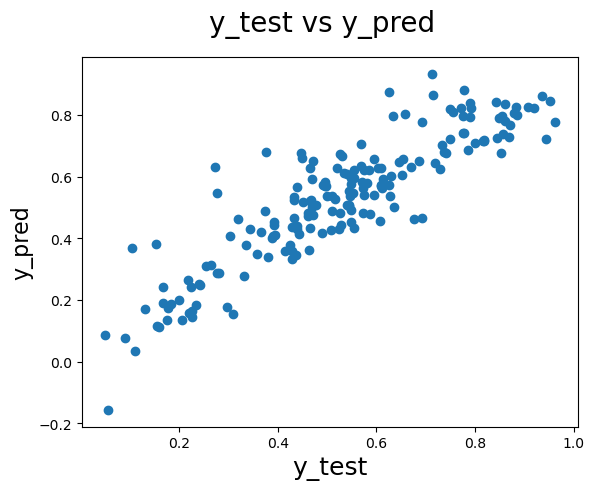

In [65]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)      

In [66]:
r2_score_test = r2_score(y_test, y_test_pred)
print(r2_score_test)

0.7895813312587453
